<h4>Deep learning is a method in artificial intelligence (AI) that teaches computers to process data in a way that is inspired by the human brain.</h4>

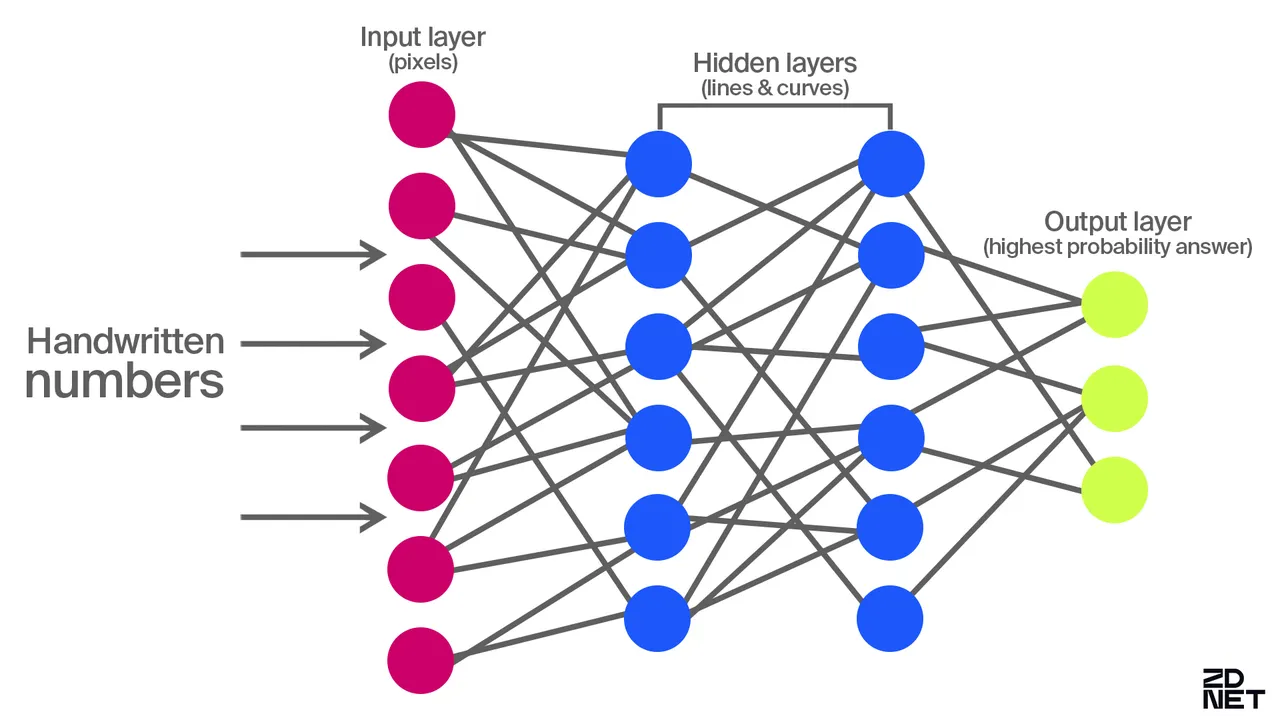

### We are going to use the classical IRIS dataset

<h3>Atttribute Information</h3>
<p><b>Class:</b> Iris Setosa, Iris Versicolour, Iris Virginica</p>
<p><b>Features:</b> Sepal Length, Sepal Width, Petal Length, Petal Width</p>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create a Model Class that inherits the nn.module
class Model(nn.Module):
    # Input Layer(4 features of the flower) --> 
    # Hidden layer1(H1) (no. of neurons) --> 
    # Hidden Layer2(H2) (NO. OF neurons) --> 
    # Output(Irish flower Class)
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        
        super().__init__() #instantiates our nn.Module
        
        # input_features is 4 as we have 4 input features (Sepal Length, Sepal Width, Petal Length, Petal Width)
        # out_features is 3 as we have 3 output classes (Iris Setosa, Iris Versicolour, Iris Virginica)
        # h1=8 and h2=9 are picked up randomly which means hidden layer 1 will have 8 and hidden layer 2 got 9 neurons
        # here fc1 denots fully connected layer
        
        self.fc1 = nn.Linear(in_features,h1) # --> Moves from input-layer to h1 
        self.fc2 = nn.Linear(h1,h2) # --> Moves from h1 to h2 
        self.out = nn.Linear(h2,out_features) # --> Moves from h2 to output-layer
        
        print(f'FC1 weight: {self.fc1.weight} || FC1 bias: {self.fc1.bias}')
        print(f'FC2 weight: {self.fc2.weight} || FC2 bias: {self.fc2.bias}')
        print(f'Out weight: {self.out.weight} || Out bias: {self.out.bias}')
        
    # Feed Forward
    def forward(self,x):
        x = F.relu(self.fc1(x)) #<- Push in the 1st layer
        x = F.relu(self.fc2(x)) #<- Push in the 2nd layer
        x = self.out(x) #<- Push in the output layer

        return x
        
        
    # relu : The rectified linear unit (ReLU) or rectifier activation function introduces the property of 
    #nonlinearity to a deep learning model and solves the vanishing gradients issue.
        
    

In [3]:
# Pick a manual seed for randomization
# torch.manual_seed(41)
torch.manual_seed(32)

In [4]:
# Create an instance of our model
model = Model()

FC1 weight: Parameter containing:
tensor([[ 0.3757, -0.2279, -0.0859,  0.2857],
        [-0.3870,  0.0793,  0.1481, -0.4771],
        [ 0.0874, -0.1746,  0.4485,  0.0219],
        [ 0.3782,  0.2254,  0.1929, -0.4741],
        [ 0.4319, -0.4087,  0.2177,  0.2271],
        [-0.0033,  0.4308, -0.1323, -0.2951],
        [ 0.1646, -0.1114, -0.4213, -0.3553],
        [-0.3191,  0.1440, -0.3496,  0.2280]], requires_grad=True) || FC1 bias: Parameter containing:
tensor([ 0.3867, -0.2029,  0.2828,  0.0105,  0.3187, -0.0630, -0.3122,  0.3781],
       requires_grad=True)
FC2 weight: Parameter containing:
tensor([[-0.2174,  0.0821,  0.2015, -0.2559, -0.3214,  0.1976, -0.3494, -0.2639],
        [ 0.1533, -0.1185,  0.2496, -0.0764,  0.0569, -0.1953,  0.0699, -0.3265],
        [-0.2689, -0.2716,  0.0416, -0.0628,  0.3519,  0.0132,  0.3048, -0.2101],
        [ 0.0877, -0.0607,  0.3204,  0.1180,  0.0254, -0.2260, -0.3002, -0.1128],
        [ 0.1822, -0.1912, -0.1485, -0.3094,  0.3335,  0.3195, -0.2034, 

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [6]:
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
84,5.4,3.0,4.5,1.5,Versicolor
5,5.4,3.9,1.7,0.4,Setosa
106,4.9,2.5,4.5,1.7,Virginica
11,4.8,3.4,1.6,0.2,Setosa
147,6.5,3.0,5.2,2.0,Virginica


In [7]:
#Ml works better with numbers so we will replace the output class with numbers
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)

In [8]:
df.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
63,6.1,2.9,4.7,1.4,1.0
41,4.5,2.3,1.3,0.3,0.0
1,4.9,3.0,1.4,0.2,0.0
62,6.0,2.2,4.0,1.0,1.0
119,6.0,2.2,5.0,1.5,2.0


In [9]:
# Train test Split
X = df.drop('variety', axis=1)
y = df['variety']

In [10]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# Convert X(independent columns) to numpy arrays
X = X.values
y = y.values

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
X_train

array([[5.7, 2.6, 3.5, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3. , 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.8, 2.7, 3.9, 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [6.2, 3

In [15]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [17]:
# Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [19]:
# Set a criterion of model to measure the error
criterion = nn.CrossEntropyLoss()

In [20]:
# Choose Optimizer - We are going to choose Adam optimizer and set learning rate
# learning rate : If the learning rate doesn't go down after a bunch of iterations (epochs ), lower our learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#### EPOCHS: 
An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model. Another way to define an epoch is the number of passes a training dataset takes around an algorithm.

In [21]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [22]:
# Train Our Model
# Epochs? One run through all the training data
epochs  = 100
losses = [] #used to keep track of our losses as we want to see it decreasing over time

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # get predicted results
    
    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train
    
    # Keep track of our losses
    losses.append(loss.detach().numpy())
    
    # print every 10 epochs
    if i % 10 ==0:
        print(f'Epoch: {i} and loss: {loss}')
        
    # Do some back propagation : Takes the error rate of forward propagation and feeds it back through the network to 
    # fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0 and loss: 1.1642627716064453
Epoch: 10 and loss: 0.9502732157707214
Epoch: 20 and loss: 0.7863702178001404
Epoch: 30 and loss: 0.6350342631340027
Epoch: 40 and loss: 0.4286562502384186
Epoch: 50 and loss: 0.2817978858947754
Epoch: 60 and loss: 0.17050126194953918
Epoch: 70 and loss: 0.10465356707572937
Epoch: 80 and loss: 0.0738060474395752
Epoch: 90 and loss: 0.05845502391457558


Text(0.5, 0, 'Epoch')

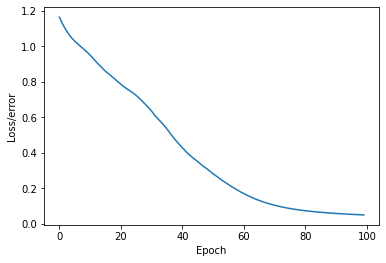

In [23]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epoch")

#### Evaluate model on Test Data Set (Validation model on test set)

In [24]:
with torch.no_grad(): # Basically turn off back propagation so that it doesn't interfere with our weights and stuff.
    y_eval = model.forward(X_test) # y_eval is prediction
    loss = criterion(y_eval,y_test) # Find loss

In [25]:
loss

tensor(0.1240)

In [26]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        if y_test[i] == 0:
            x = "Setosa"
        elif y_test[i] == 1:
            x = "Versicolor"
        else:
            x = "Virginica"
        
        # This below code will tell us what type of flower class our NN think it is
        print(f'{i+1}.)  {str(y_val)} \t {x} \t {y_test[i]}')
        
        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
print(f'\nWe got {correct} correct')

1.)  tensor([-7.2039,  2.1721,  5.4994]) 	 Virginica 	 2
2.)  tensor([-9.1732,  1.3745,  7.8775]) 	 Virginica 	 2
3.)  tensor([-10.1985,   1.7705,   8.6772]) 	 Virginica 	 2
4.)  tensor([-3.0827,  4.1812, -0.1920]) 	 Versicolor 	 1
5.)  tensor([-8.3784,  2.0315,  6.6663]) 	 Virginica 	 2
6.)  tensor([-1.5283,  4.3402, -1.9532]) 	 Versicolor 	 1
7.)  tensor([-6.5455,  2.5353,  4.4948]) 	 Virginica 	 2
8.)  tensor([-2.5963,  4.2664, -0.8098]) 	 Versicolor 	 1
9.)  tensor([-7.2847,  2.3287,  5.3471]) 	 Virginica 	 2
10.)  tensor([-9.6250,  1.4546,  8.2592]) 	 Virginica 	 2
11.)  tensor([-5.8126,  2.7934,  3.5324]) 	 Virginica 	 2
12.)  tensor([  7.1656,   1.4196, -11.7688]) 	 Setosa 	 0
13.)  tensor([  6.4275,   1.2548, -10.5445]) 	 Setosa 	 0
14.)  tensor([-0.5550,  3.7271, -2.5151]) 	 Versicolor 	 1
15.)  tensor([  6.1486,   1.6963, -10.5360]) 	 Setosa 	 0
16.)  tensor([-5.4478,  3.2660,  2.8794]) 	 Virginica 	 2
17.)  tensor([  6.4697,   1.4848, -10.8310]) 	 Setosa 	 0
18.)  tensor([-6

In [27]:
# New datapoint which we are going to feed in our NN and let our NN predict the class of the flower
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [28]:
# New datapoint prediction
with torch.no_grad():
    print(model(new_iris))

tensor([  6.8775,   1.2704, -11.2076])


In [29]:
# Save our NN Model
torch.save(model.state_dict(), 'my_first_nn_iris_model.pt') # This will svae our weights and biases of our model into dictionary

In [30]:
# Load the saved .pt file
new_model = Model()
new_model.load_state_dict(torch.load('my_first_nn_iris_model.pt'))

FC1 weight: Parameter containing:
tensor([[-0.4483,  0.2967,  0.4703,  0.0379],
        [-0.1968, -0.1165, -0.3732,  0.1430],
        [ 0.2084, -0.1021, -0.2458,  0.2608],
        [-0.0630,  0.1844,  0.0995,  0.3405],
        [-0.2360, -0.4469,  0.0364, -0.4200],
        [-0.4655,  0.3692, -0.0404,  0.3388],
        [ 0.2247,  0.4219,  0.0938,  0.4550],
        [-0.2065, -0.3126, -0.0254, -0.1133]], requires_grad=True) || FC1 bias: Parameter containing:
tensor([ 0.2929, -0.0674,  0.0578, -0.2413, -0.3875,  0.1824, -0.2482,  0.4632],
       requires_grad=True)
FC2 weight: Parameter containing:
tensor([[ 0.3230, -0.3110, -0.1474, -0.2190,  0.3532, -0.1813,  0.3339,  0.2807],
        [-0.0488, -0.1049,  0.2596, -0.0552, -0.0511,  0.0638, -0.3296, -0.0143],
        [ 0.1841, -0.1458, -0.0347, -0.2186, -0.0506,  0.1760, -0.0188, -0.2574],
        [ 0.0778, -0.2624,  0.3111,  0.1401,  0.0306, -0.2765,  0.3430, -0.3421],
        [-0.0147, -0.2912, -0.2924,  0.0907,  0.2389,  0.1267,  0.3337, 

<All keys matched successfully>

In [31]:
# To make sure it loaded properly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## Some Notes to help you out

#### nn module

PyTorch contains torch.nn module is used to train and build the layers of neural networks such as input, hidden, and output. Torch.nn base class helps wrap the torch's parameters, functions, and layers.nn module.

#### What is nn.linear in PyTorch?

nn.linear(n,m) module takes n inputs to create a single-layer feed-forward network with m outputs.

#### Implementation of nn.linear

In [32]:
m = nn.Linear(20,30)
m

Linear(in_features=20, out_features=30, bias=True)

In [33]:
input = torch.randn(128,20)
input

tensor([[-0.7194, -0.8048, -0.4502,  ..., -0.3866, -0.8786,  2.0557],
        [-0.8858, -0.8002,  2.7623,  ...,  2.2686, -0.2104,  0.6783],
        [-0.8106,  0.3905, -1.0057,  ..., -0.5118, -0.1941,  1.3058],
        ...,
        [ 1.2554,  1.6026, -2.0880,  ..., -1.0705, -0.3670,  1.0579],
        [ 1.8050,  0.1382, -0.0347,  ..., -1.6806,  0.1642,  0.3382],
        [-0.5459,  1.0465, -0.3144,  ...,  1.6691, -2.1277,  1.2756]])

In [34]:
output = m(input)
output

tensor([[-0.3306, -0.6675,  0.6563,  ..., -0.0836,  0.0597, -0.4740],
        [-1.5222, -0.4216,  0.5645,  ..., -0.0633, -0.3810,  0.3845],
        [-0.5611,  1.2278,  0.1931,  ..., -0.5097,  1.2413, -0.0772],
        ...,
        [ 0.0230,  0.2395,  0.6834,  ...,  0.9133,  0.4902, -0.7440],
        [-0.7625, -0.4406, -0.5305,  ...,  0.4508,  0.6808, -0.1005],
        [-0.2697, -0.2465,  0.1818,  ...,  0.4278, -0.3210,  0.0419]],
       grad_fn=<AddmmBackward0>)

In [35]:
print(output.size())

torch.Size([128, 30])


#### nn.relu

An activation function which is represented in the form of relu(x) = { 0 if x<0, x if x > 0} is called PyTorch ReLU. For each layer, an activation function is applied in the form of ReLU function which makes the layers as non-linear layers. The ReLU function is f(x)=max(0,x)

It replaces all negative values in the input tensor with zero, leaving positive values unchanged. The primary purpose of ReLU activation is to introduce non-linearity to the neural network, allowing it to learn complex patterns and relationships in the data. The nn.ReLU module is commonly used after linear transformations (e.g., nn.Linear layers) in neural network architectures. 

#### Implementation of nn.relu

In [36]:
output_relu = nn.ReLU()(output)
output_relu

tensor([[0.0000, 0.0000, 0.6563,  ..., 0.0000, 0.0597, 0.0000],
        [0.0000, 0.0000, 0.5645,  ..., 0.0000, 0.0000, 0.3845],
        [0.0000, 1.2278, 0.1931,  ..., 0.0000, 1.2413, 0.0000],
        ...,
        [0.0230, 0.2395, 0.6834,  ..., 0.9133, 0.4902, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4508, 0.6808, 0.0000],
        [0.0000, 0.0000, 0.1818,  ..., 0.4278, 0.0000, 0.0419]],
       grad_fn=<ReluBackward0>)

ReLU activation functions help in overcoming the vanishing gradient problem, make training more efficient, simplify network architectures, and enable the network to learn complex non-linear relationships in the data, all while being computationally efficient to compute.

#### torch.manual_seed

Whenever we train a neural network from scratch, it’s weights are initialized with random values. So, if you re-run the same training job again and again, the values used to initialized the weights will keep on changing as they would be randomly generated.


torch.manual_seed() is a function in the PyTorch library which sets the seed for generating random numbers. When you set a manual seed, it ensures that the random numbers generated by PyTorch operations will be deterministic, i.e., they will be the same every time you run your code, given the same seed.

If you don't use torch.manual_seed(), PyTorch will use a random seed based on the system time or some other system-specific source of randomness. As a result, the random numbers generated by PyTorch operations will be different each time you run your code, which can make it difficult to reproduce results exactly, especially in machine learning experiments.

#### nn.CrossEntropyLoss()

<ul>
<li>nn.CrossEntropyLoss() is a loss function specifically designed for multi-class classification problems in PyTorch's nn (neural network) module.</li>
<li>It calculates the cross-entropy loss between the output predictions of your model (logits or log-probabilities) and the ground truth labels (class indices).</li>
</ul>

#### What is EPOCHS?

In the context of deep learning, "epochs" refer to the number of times the entire dataset is passed forward and backward through the neural network. In simpler terms, an epoch is one complete cycle through all the training data.

During each epoch, the model learns from the training data by adjusting its weights and biases through techniques like gradient descent and backpropagation. After each epoch, the model's performance is evaluated on a separate validation dataset to monitor its progress and prevent overfitting.

The number of epochs is a hyperparameter that needs to be specified before training begins. It is crucial to find the right balance; too few epochs may result in underfitting (where the model hasn't learned enough from the data), while too many epochs may lead to overfitting (where the model learns the training data too well but fails to generalize to new, unseen data).

#### Note : Find this out why?
You should avoid calling Module.forward. The difference is that all the hooks are dispatched in the __call__ function, so if you call .forward and have hooks in your model, the hooks won’t have any effect

#### torch.no_grad()

The requires_grad argument tells PyTorch that we want to be able to calculate the gradients for those values. However, the with torch.no_grad() tells PyTorch to not calculate the gradients, and the program explicitly uses it here (as with most neural networks) in order to not update the gradients when it is updating the weights as that would affect the back propagation.

The wrapper with torch.no_grad() temporarily sets all of the requires_grad flags to false. 

#### Implementation of torch.no_grad()

In [40]:
x = torch.randn(3, requires_grad=True)
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False
